In [4]:
import numpy as np
import pandas as pd

In [5]:
import pickle
import xgboost as xgb
with open("xgb_model.pkl", "rb") as f:
    model=pickle.load(f)

In [ ]:
import shap
dt=pd.read_csv('x_train.csv')
x_train=dt.to_numpy()
explainer = shap.Explainer(model, x_train)

# Compute SHAP values for the training data
shap_values = explainer(x_train)

# Compute mean absolute SHAP values across all samples (Feature Importance)
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Convert to a dictionary with feature names
feature_names = list(x_train.columns) if isinstance(x_train, pd.DataFrame) else [f"Feature {i}" for i in range(x_train.shape[1])]
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Save the feature importance using pickle
with open("feature_importance.pkl", "wb") as f:
    pickle.dump(feature_importance_dict, f)

print("Feature importance calculated and saved successfully!")

  7%|=                   | 3800/52000 [02:19<29:23]       

Top 20 Features by Mean Absolute SHAP Value:
 1. match_EWMA Fantasy Points                          2.9835
 2. match_Balls_Thrown                                 1.5998
 3. match_total_points                                 1.2315
 4. match_Boundaries_Given                             1.0460
 5. match_Batting_Average                              0.8351
 6. weather_precipitation                              0.7797
 7. match_Boundaries_Scored                            0.7149
 8. match_Balls_Faced                                  0.7105
 9. match_matches_played                               0.6480
10. venue_fantasy_points                               0.6031
11. match_Wickets                                      0.5755
12. weather_wind_speed                                 0.5066
13. venue_balls_thrown                                 0.4960
14. match_Strike_Rate                                  0.4494
15. weather_temperature                                0.4436
16. match_Runs_Given     

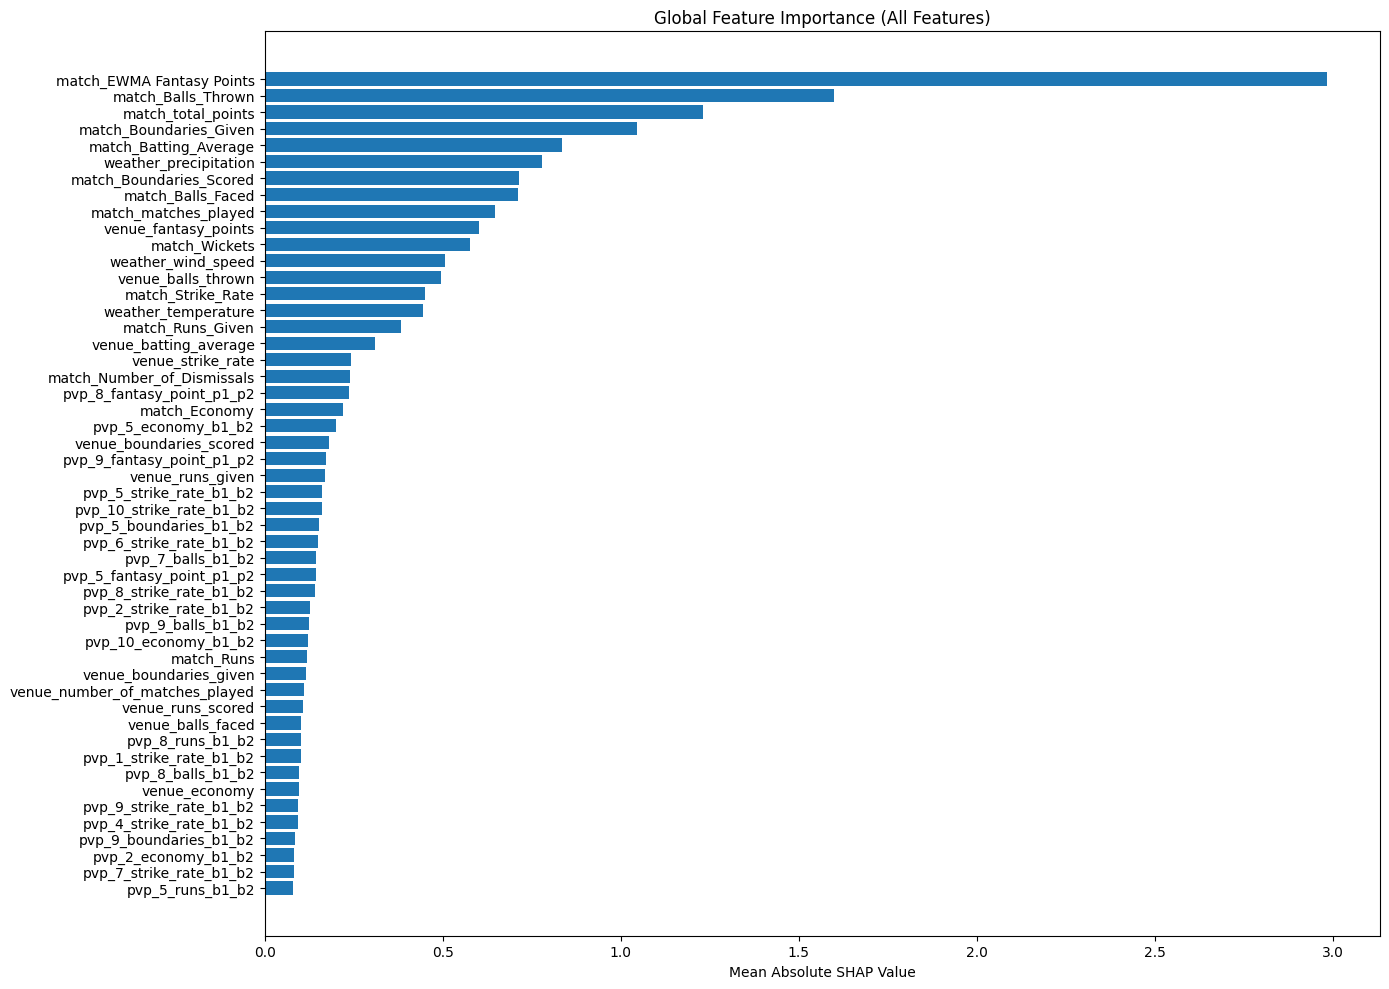

In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the saved feature importance dictionary
with open("feature_importance.pkl", "rb") as f:
    feature_importance = pickle.load(f)

# 2. Load all_features list (your custom feature names)
with open("all_features.pkl", "rb") as f:
    all_features = pickle.load(f)

# 3. Replace feature keys with the actual feature names
# The keys in feature_importance are like 'Feature 0', 'Feature 1', etc.
updated_feature_importance = {}
for key, value in feature_importance.items():
    if key.startswith('Feature '):
        feature_index = int(key.split(' ')[1])
        feature_name = all_features[feature_index]
        updated_feature_importance[feature_name] = value
    else:
        # fallback, if keys are already named (safety check)
        updated_feature_importance[key] = value

# 4. Sort features by importance (descending)
sorted_features = sorted(updated_feature_importance.items(), key=lambda x: x[1], reverse=True)

# 5. Print top 20 features
print("Top 20 Features by Mean Absolute SHAP Value:")
for i, (feat, imp) in enumerate(sorted_features[:20], start=1):
    print(f"{i:2d}. {feat:50s} {imp:.4f}")

# 6. Plot all feature importances
features, importances = zip(*sorted_features[:50])
plt.figure(figsize=(14, 10))
plt.barh(features[::-1], importances[::-1])
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Global Feature Importance (All Features)")
plt.tight_layout()
plt.savefig("images/feature_importance_50.png")
plt.show()
